# Pymaceuticals Inc.
---

### Analysis

-Three observations or inferences that can be made from the data:
1. The mean tumor volume for Capomulin and Ramicane are the same. 
2. Both Capomulin and Ramicane had the most timepoints recorded per mouse which may be a factor as to why the tumor sizes are similar.
3. There is a strong correlation between tumor volume and mouse weight in the Capomulin group but it does not prove causation. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data= pd.merge(mouse_metadata,study_results,how='left',on='Mouse ID')

# Display the data table for preview
data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_mice=data['Mouse ID'].nunique()
number_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate=data.loc[data.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicate

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
#data[duplicate]

In [5]:
#data[data['Mouse ID'] != 'k403']

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data=data[data['Mouse ID'].isin(duplicate)==False]
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
number_mice2=clean_data['Mouse ID'].nunique()
number_mice2

248

## Summary Statistics

In [8]:
# clean_data[clean_data['Drug Regimen']=='Capomulin']['Mouse ID'].sort_values(ascending=False)

In [9]:
grp = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)']

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Assemble the resulting series into a single summary DataFrame.

summary_statistics_df = pd.DataFrame({
    "Mean Tumor Volume": grp.mean(),
    "Median Tumor Volume": grp.median(),
    "Tumor Volume Variance": grp.var(),
    "Tumor Volume std dev": grp.std(),
    "Tumor Volume std err": grp.sem(),
})


# Use DataFrame.group() Function
#result = df.groupby('Courses')['Fee','Discount'].aggregate('sum')
summary_statistics_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume std dev,Tumor Volume std err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
grp.agg(['mean','median','var','std','sem']).style.set_caption('Tumor Volume (mm3)')

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

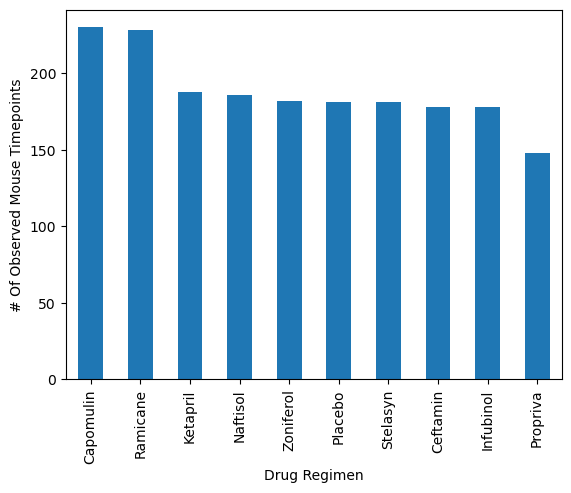

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
m_count = grp.count().sort_values(ascending=False)
m_count.plot.bar(ylabel='# Of Observed Mouse Timepoints');

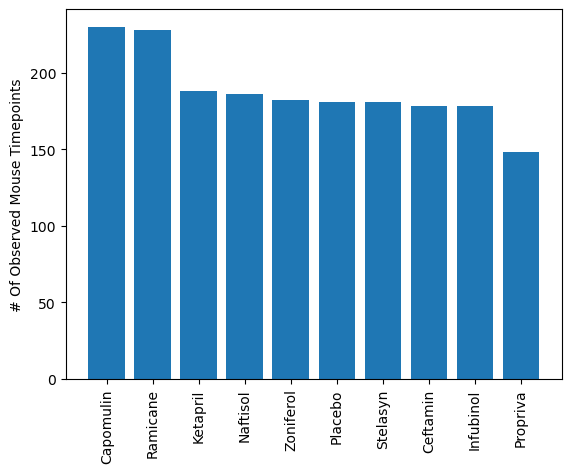

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(m_count.index,m_count)
plt.xticks(rotation=90)
plt.ylabel('# Of Observed Mouse Timepoints')
plt.show()

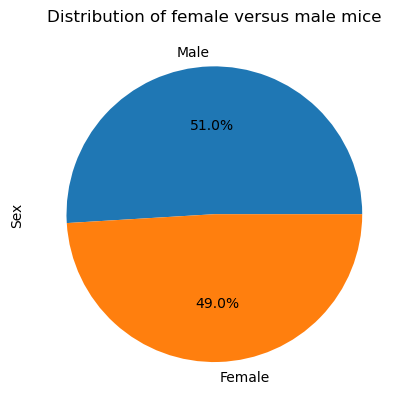

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
s_count = clean_data.Sex.value_counts()
s_count.plot.pie(ylabel='Sex',autopct='%.1f%%', title="Distribution of female versus male mice");


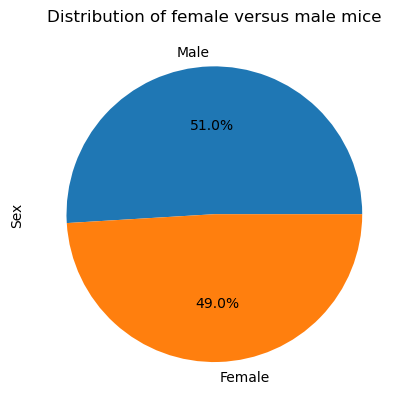

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(s_count, labels=s_count.index, autopct='%.1f%%')
plt.ylabel('Sex')
plt.title("Distribution of female versus male mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drugs=["Capomulin","Ramicane", "Infubinol","Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
ftv =clean_data.groupby('Mouse ID')['Timepoint']
timepoint=ftv.max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mtumor_volume=pd.merge(timepoint,clean_data, how='left',on=['Mouse ID', 'Timepoint'])
filtereddrug=mtumor_volume.loc[mtumor_volume["Drug Regimen"].isin(drugs)]
final=filtereddrug.reset_index()

final.head()

,index,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,0,a203,45,Infubinol,Female,20,23,67.973419,2
1,1,a251,45,Infubinol,Female,21,25,65.525743,1
2,3,a275,45,Ceftamin,Female,20,28,62.999356,3
3,6,a411,45,Ramicane,Male,3,22,38.407618,1
4,7,a444,45,Ramicane,Female,10,25,43.047543,0


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
drugs=["Capomulin","Ramicane", "Infubinol","Ceftamin"]
tumor_volume_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    location=final.loc[final["Drug Regimen"]==drug,"Tumor Volume (mm3)"]
    # create a subset
    tumor_volume_data.append(location)
    # Determine outliers using upper and lower bounds
    quartile=location.quantile([.25,.5,.75])
    upper_quartile=quartile[0.75]
    lower_quartile=quartile[0.25]
    iqr= upper_quartile-lower_quartile
    
    #quantitatively determine if there are any potential outlier
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)

    outliers = location[(location < lower_bound) | (location > upper_bound)]
    print(outliers)

Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)


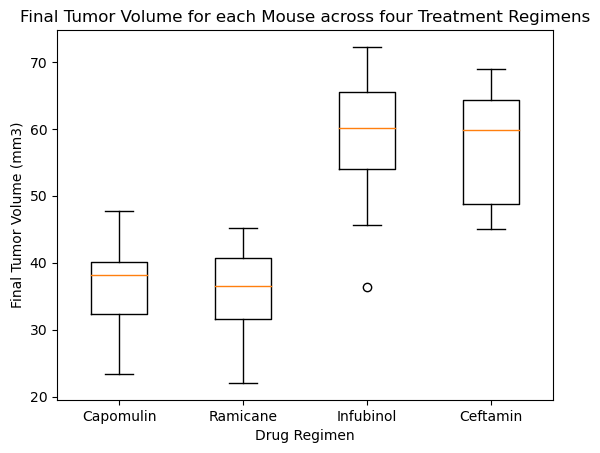

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots() 
ax1.set_title('Final Tumor Volume for each Mouse across four Treatment Regimens') 
ax1.set_ylabel('Final Tumor Volume (mm3)') 
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(tumor_volume_data, labels=drugs) 
flierprops=dict(marker='o', color='r', markersize=10)
plt.show()

## Line and Scatter Plots

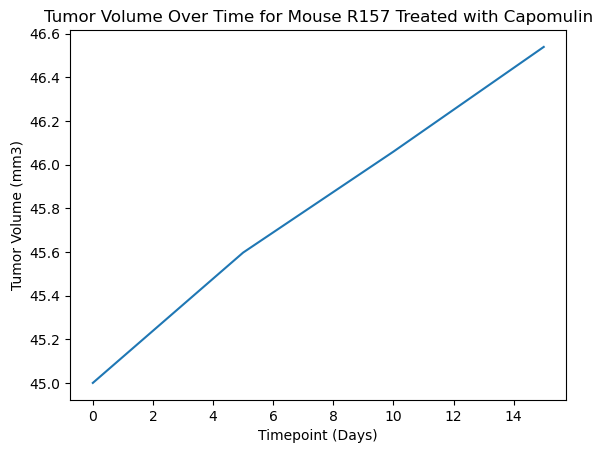

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# I chose a different ID
capomulin_data = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin']
mouse_data = capomulin_data.loc[capomulin_data['Mouse ID'] == 'r157']
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
plt.title('Tumor Volume Over Time for Mouse R157 Treated with Capomulin') 
plt.xlabel('Timepoint (Days)') 
plt.ylabel('Tumor Volume (mm3)') 
plt.show()


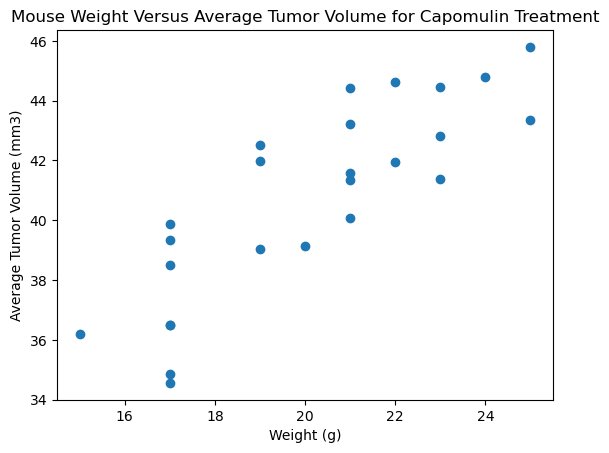

In [28]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#capomulin_data
#print(capomulin_data)
capomulin_data = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin']
average = capomulin_data.groupby(['Mouse ID']).mean('Tumor Volume (mm3)')
plt.scatter(average['Weight (g)'],average['Tumor Volume (mm3)'])
plt.title('Mouse Weight Versus Average Tumor Volume for Capomulin Treatment') 
plt.xlabel('Weight (g)') 
plt.ylabel('Average Tumor Volume (mm3)') 
plt.show()



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


In [48]:
#correlation coefficient
cor=round(st.pearsonr(average['Weight (g)'],average['Tumor Volume (mm3)'])[0],2)
print(f"The correlation coefficient is {cor}")

The correlation coefficient is 0.84


0.84


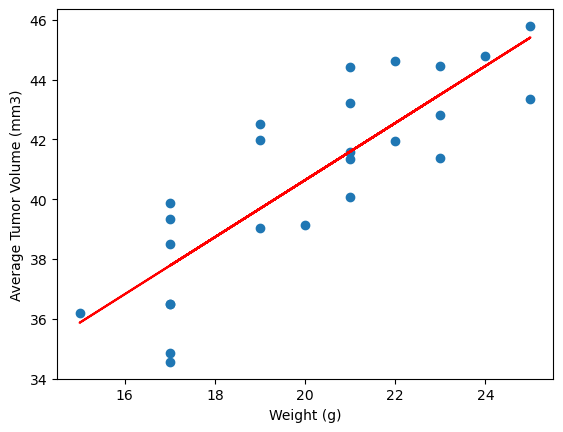

In [44]:
#linear regression model 
lineregress=st.linregress(average['Weight (g)'],average['Tumor Volume (mm3)'])
yvalues=average['Weight (g)']*lineregress[0]+lineregress[1]
plt.scatter(average['Weight (g)'],average['Tumor Volume (mm3)'])
plt.plot(average['Weight (g)'], yvalues, color="r")
plt.xlabel('Weight (g)') 
plt.ylabel('Average Tumor Volume (mm3)') 
plt.show()